#Bath Soap Consumer Segmentation Project
by Abigail McDonald

###Business Background
Business Situation
CRISA is an Asian market research agency that specializes in tracking consumer purchase behavior in consumer goods (both durable and nondurable). In one major research project, CRISA tracks numerous consumer product categories (e.g., “detergents”), and, within each category,  perhaps  dozens  of brands.  To  track  purchase  behavior,  CRISA  constituted household panels in over 100 cities and towns in India, covering most of the Indian urban market.  The  households  were  carefully selected  using  stratified  sampling  to  ensure  a representative sample; a subset of 600 records is analyzed here. The strata were defined on the basis of socioeconomic status and the market (a collection of cities).

CRISA has both transaction data (each row is a transaction) and household data (each row is a household), and for the household data it maintains the following information:

*    Demographics of the households (updated annually)
*    Possession of durable goods (car, washing machine, etc., updated annually; an “affluence index” is computed from this information)
*     Purchase data of product categories and brands (updated monthly)

CRISA has two categories of clients: (1) advertising agencies that subscribe to the database services,  obtain  updated  data  every  month,  and  use  the  data  to  advise  their  clients on advertising and promotion strategies; (2) consumer goods manufacturers, which monitor their using the CRISA database.


####Business Problem
CRISA has traditionally segmented markets on the basis of purchaser demographics. They would now like to segment the market based on two key sets of variables more directly related to the purchase process and to brand loyalty:
1. Purchase behavior (volume, frequency, susceptibility to discounts, and brand loyalty)
2. Basis of purchase (price, selling proposition)

Doing so would allow CRISA to gain information about what demographic attributes are associated with different purchase behaviors and degrees of brand loyalty, and thus deploy promotion budgets more effectively. More effective market segmentation would enable CRISA’s clients (in this case, a firm called IMRB) to design more cost-effective promotions targeted at appropriate segments. Thus, multiple promotions could be launched, each targeted at different market segments at different times of the year. This would result in a more cost effective allocation of the promotion budget to different market segments. It would also enable IMRB to design more effective customer reward systems and thereby increase brand loyalty.

####Data
The data in the below table profile each household, each row containing the data for one household.

**Measuring Brand Loyalty**

Several variables in this case measure aspects of brand loyalty. The number of different brands purchased by the customer is one measure of loyalty. However, a consumer who purchases one or two brands in quick succession, then settles on a third for a long streak, is different from a consumer who constantly switches back and forth among three brands. Therefore, how often customers switch from one brand to another is another measure of loyalty. Yet a third perspective on the same issue is the proportion of purchases that go to different brands—a consumer who spends 90% of his or her purchase money on one brand is more loyal than a consumer who spends more equally among several brands. All three of these components can be measured with the data in the purchase summary worksheet.

### *Variable Name/Description*

***Member id***/ Unique identifier for each household

#### **Demographics:** 

***SEC***/ Socioeconomic class (1 = high, 5 = low)

***FEH***/ Eating habits (1 = vegetarian, 2 = vegetarian but eat eggs, 3 = nonvegetarian, 0 = not specified)

***MT***/ Native language (see table in worksheet)

***SEX***/ Gender of homemaker (1 = male, 2 = female)

***AGE***/ Age of homemaker

***EDU***/ Education of homemaker (1 = minimum, 9 = maximum)

***HS***/ Number of members in household

***CHILD***/ Presence of children in household (4 categories)

***CS***/ Television availability (1 = available, 2 = unavailable) 

***Affluence Index***/ Weighted value of durables possessed

#### **Purchase summary over the period:**                              

***No. of Brands***/ Number of brands purchased

***Brand Runs***/ Number of instances of consecutive purchase of brands 

***Total Volume***/ Sum of volume

***No. of Trans***/ Number of purchase transactions (multiple brands purchased in a month are counted as separate transactions)

***Value***/ Sum of value

***Trans/Brand Runs***/  Average transactions per brand run 

***Vol/Trans***/  Average volume per transaction

***Avg. Price***/ Average price of purchase

#### **Purchase within promotion:**                                      

***Pur Vol***/ Percent of volume purchased 

***No Promo*** - %/ Percent of volume purchased under no promotion

***Pur Vol 6%***/ Promo 6% Percent of volume purchased under promotion code 6 

***Pur Vol Other Promo%***/ Percent of volume purchased under other promotions

####**Brandwise purchase:**

***Br. Cd. (57, 144), 55, 272, 286, 24, 481, 352, 5, and 999 (others)***/ Percent of volume purchased of the brand

####**Price categorywise purchase:**

***Price Cat 1 to 4***/ Percent of volume purchased under the price category

####**Selling propositionwise purchase:**
                                                     
***Proposition Cat 5 to 15***/ Percent of volume purchased under the product proposition category

###Preprocess Data

In [25]:
#load dictionaries and dataset
!pip install dmba
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from dmba import plotDecisionTree, classificationSummary, liftChart
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

soap_df = pd.read_csv("BathSoapHousehold.csv")
soap_df = soap_df.set_index("Member id")
soap_df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4,3,10,1,4,4,2,4,1,2,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1010020,3,2,10,2,2,4,4,2,1,19,...,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
1014020,2,3,10,2,4,5,6,4,1,23,...,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
1014030,4,0,0,0,4,0,0,5,0,0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
1014190,4,1,10,2,3,4,4,3,1,10,...,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [26]:
#check and change datatypes
print(soap_df.shape)
soap_df = soap_df.apply(lambda x: x.astype('float64'))
soap_df.dtypes


(600, 45)


SEC                      float64
FEH                      float64
MT                       float64
SEX                      float64
AGE                      float64
EDU                      float64
HS                       float64
CHILD                    float64
CS                       float64
Affluence Index          float64
No. of Brands            float64
Brand Runs               float64
Total Volume             float64
No. of  Trans            float64
Value                    float64
Trans / Brand Runs       float64
Vol/Tran                 float64
Avg. Price               float64
Pur Vol No Promo - %     float64
Pur Vol Promo 6 %        float64
Pur Vol Other Promo %    float64
Br. Cd. 57, 144          float64
Br. Cd. 55               float64
Br. Cd. 272              float64
Br. Cd. 286              float64
Br. Cd. 24               float64
Br. Cd. 481              float64
Br. Cd. 352              float64
Br. Cd. 5                float64
Others 999               float64
Pr Cat 1  

In [27]:
 #look for missing values
 null_data = soap_df[soap_df.isnull().values.any(axis=1)]
 null_data

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,


(600, 45)


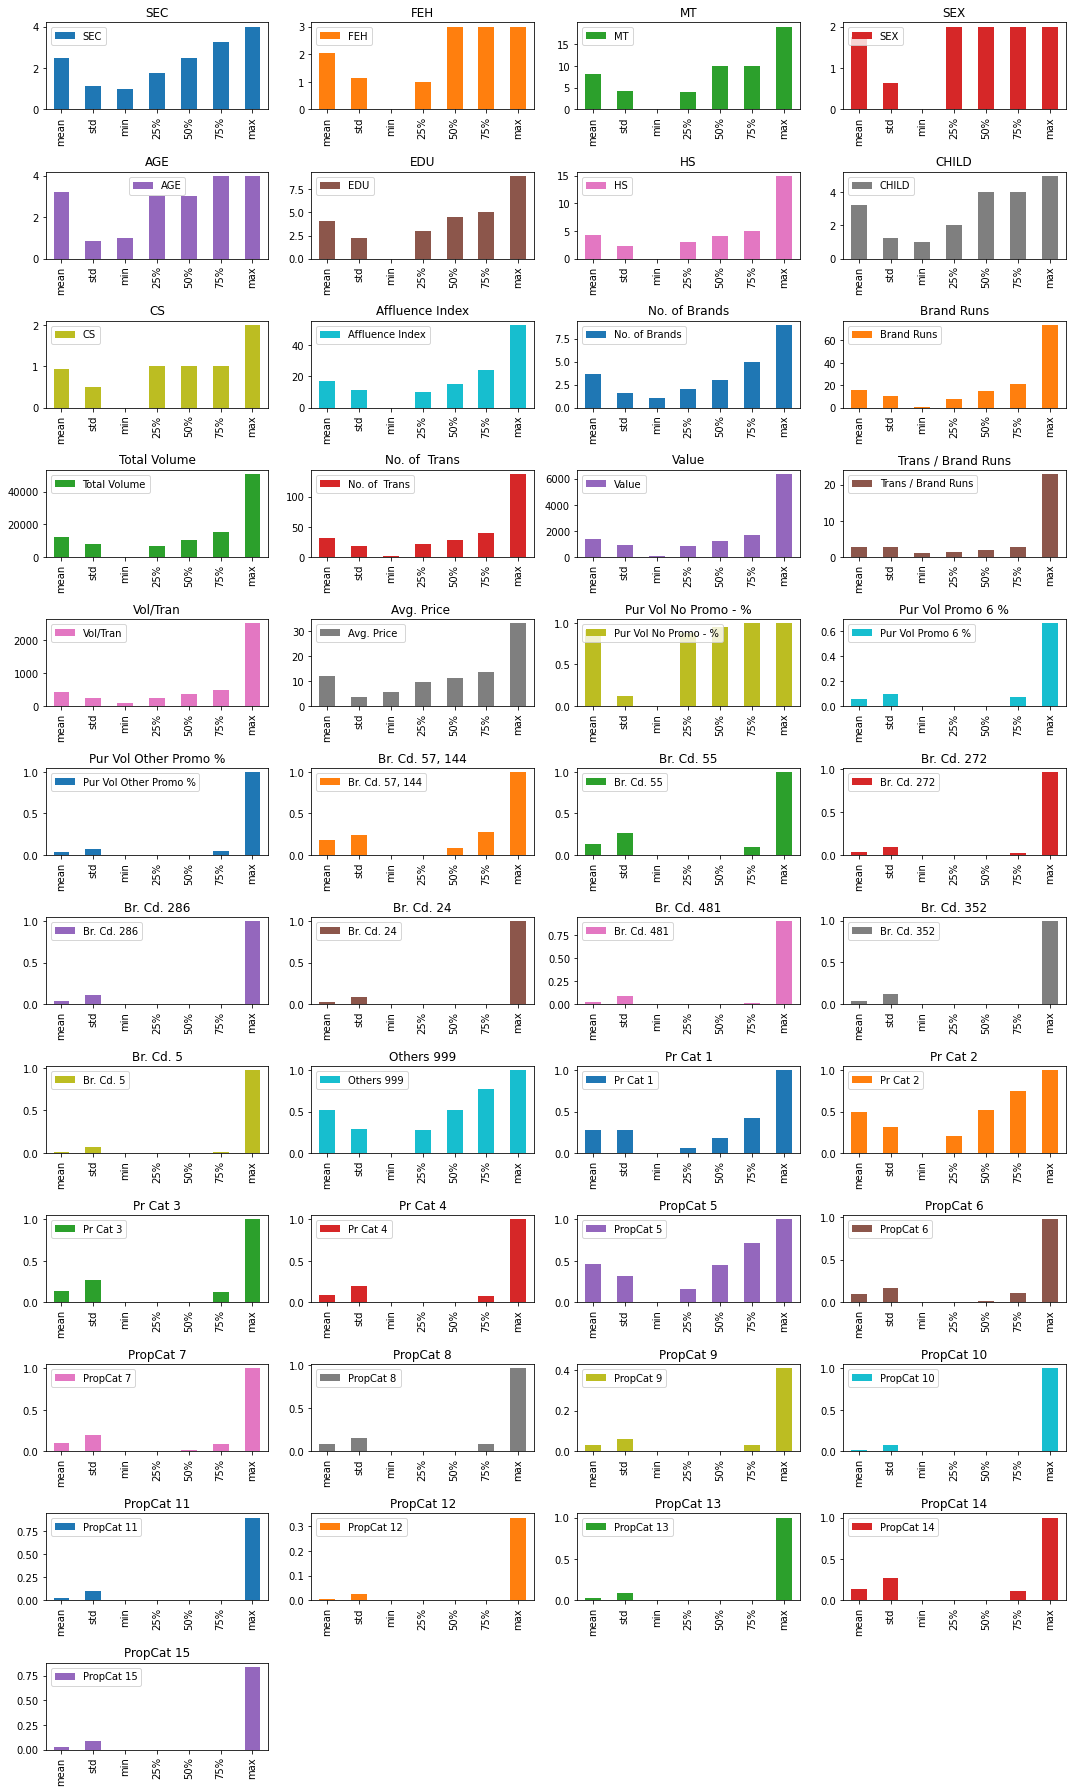

In [28]:
#check shape and statistics on data
print(soap_df.shape)
soap_plt = soap_df.describe()
#drop count to visualize other statistics
soap_plt = soap_plt.drop("count")
soap_plt.plot(kind='bar', subplots=True, layout=(-1,4), figsize=(15,25), sharex=False);
plt.tight_layout()

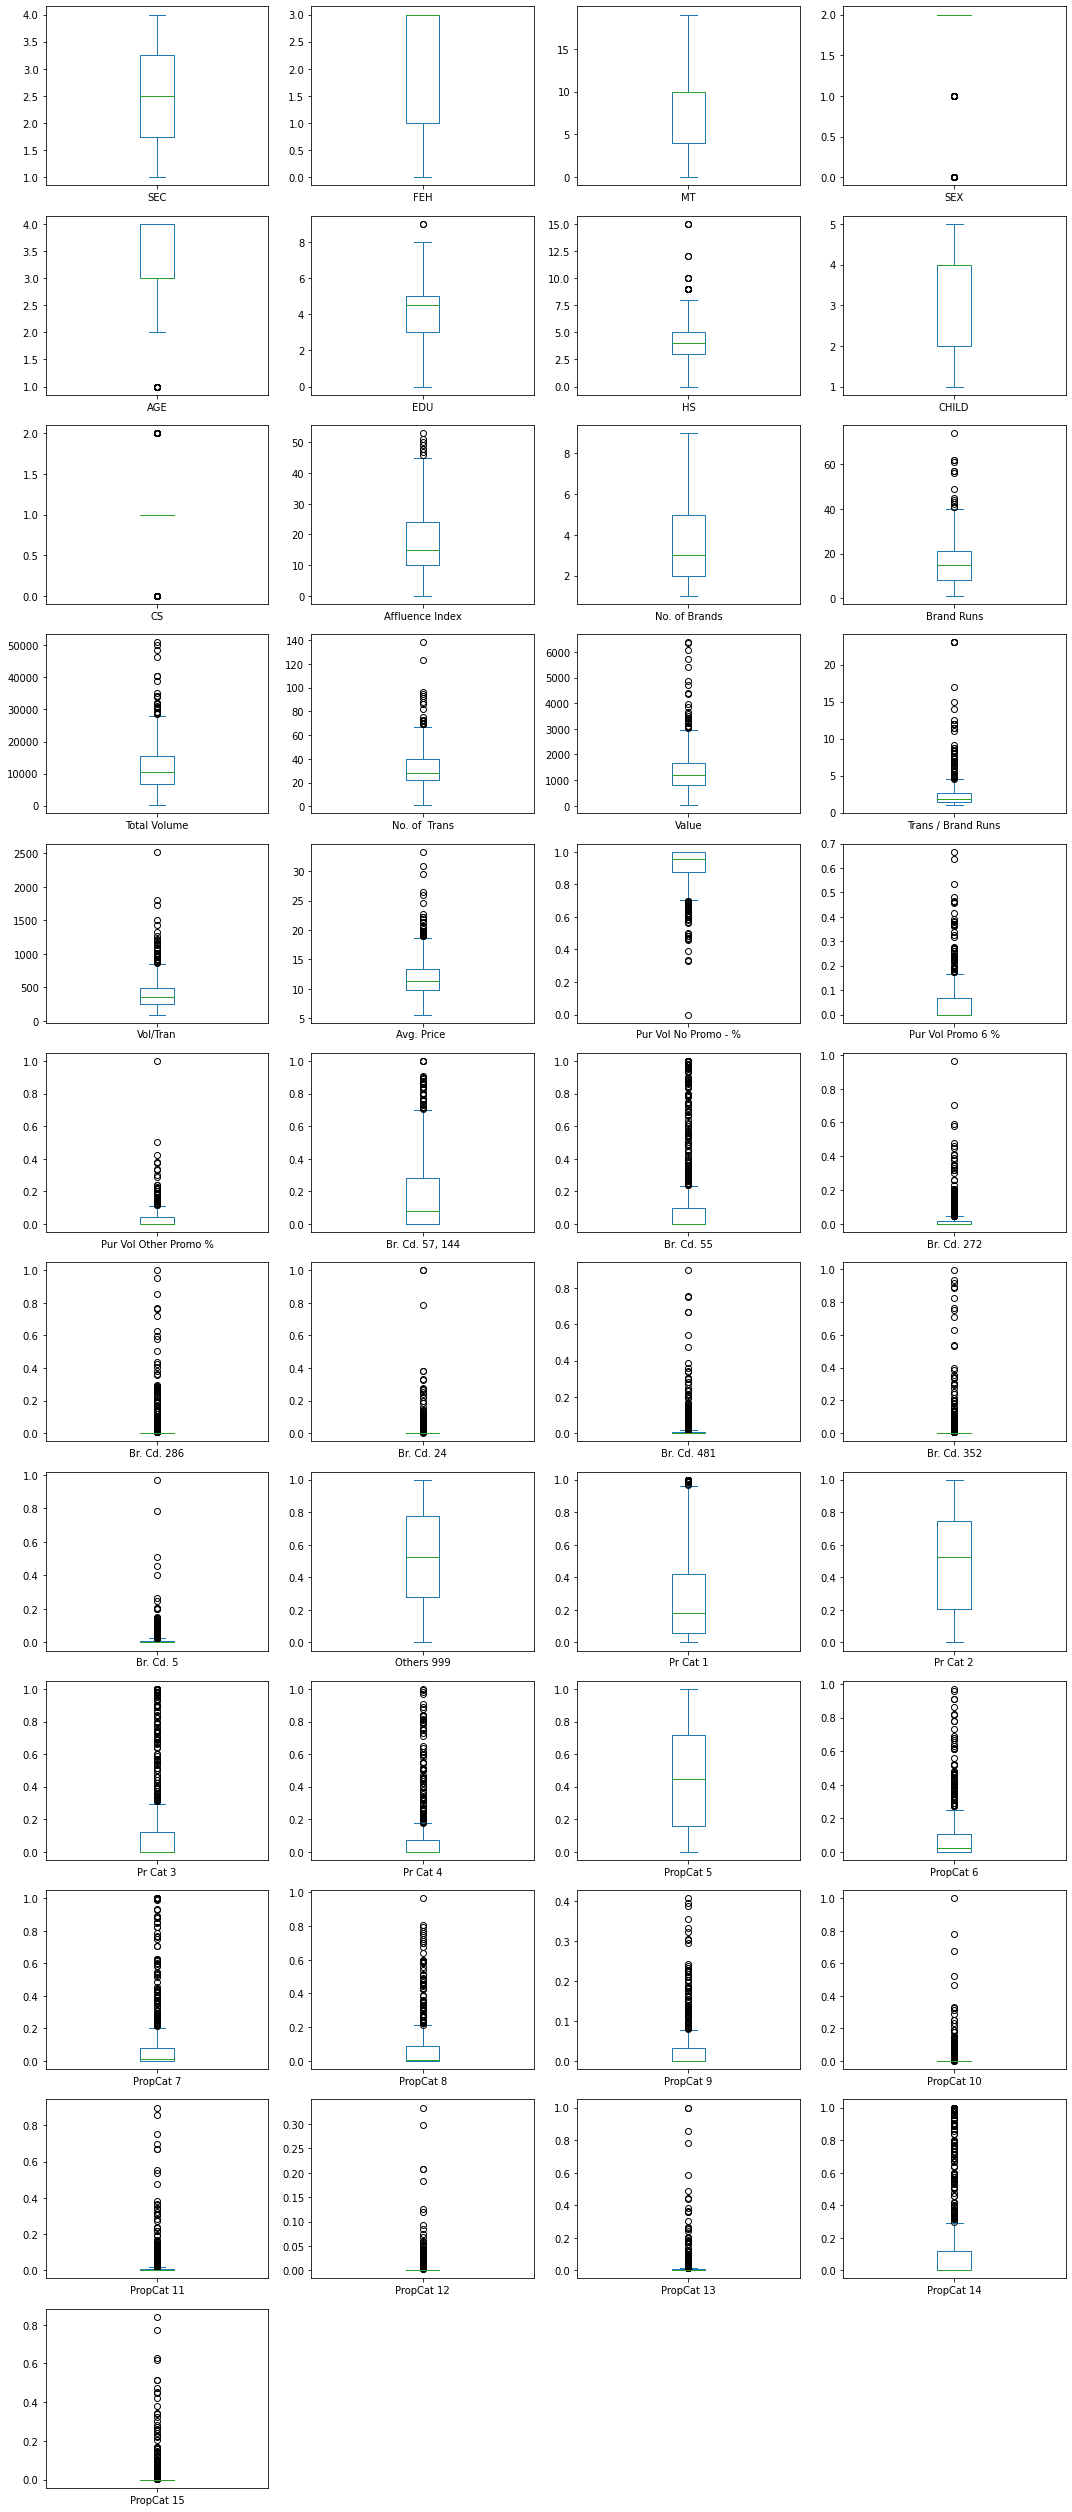

In [29]:
 #looking for outliers
soap_df.plot(kind='box', subplots=True, layout=(-1,4), figsize=(15,35), sharex=False);
plt.tight_layout()

In [30]:
#normalize data
soap_norm = soap_df.apply(preprocessing.scale, axis=0)
soap_norm

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,1.341641,0.839199,0.424526,-1.139458,0.909686,-0.019803,-0.953656,0.630433,0.134793,-1.317478,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,0.829966,-0.261486,-0.021215,3.589688
1010020,0.447214,-0.042621,0.424526,0.403826,-1.403075,-0.019803,-0.083400,-1.014175,0.134793,0.173676,...,1.532717,-0.358265,-0.420163,-0.262803,-0.264365,0.301536,-0.236478,-0.261486,-0.210590,-0.290201
1014020,-0.447214,0.839199,0.424526,0.403826,0.909686,0.437198,0.786857,0.630433,0.134793,0.524535,...,0.173827,-0.323929,-0.454785,-0.352876,-0.264365,-0.298493,0.380997,-0.261486,1.599587,-0.253104
1014030,1.341641,-1.806261,-1.905900,-2.682741,0.909686,-1.847808,-1.823913,1.452736,-1.837792,-1.492908,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,1.743712,-0.290201
1014190,1.341641,-0.924441,0.424526,0.403826,-0.246695,-0.019803,-0.083400,-0.191871,0.134793,-0.615759,...,-0.555525,-0.495454,-0.209632,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,0.030462,-0.290201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167090,-0.447214,0.839199,0.424526,0.403826,0.909686,0.437198,0.351729,0.630433,0.134793,-0.177184,...,-0.555525,-0.495454,-0.525782,-0.490823,0.061132,8.823881,-0.236478,-0.261486,-0.513426,-0.290201
1167230,0.447214,0.839199,0.424526,0.403826,-0.246695,0.437198,-0.083400,0.630433,0.134793,1.050825,...,2.036021,-0.115809,0.448492,-0.490823,0.252706,-0.298493,-0.236478,0.672876,-0.513426,0.275447
1167340,0.447214,0.839199,2.055825,0.403826,0.909686,-0.019803,2.092242,0.630433,0.134793,-0.352614,...,0.209542,-0.495454,-0.322892,-0.490823,0.240379,-0.298493,-0.236478,-0.261486,0.165266,-0.290201


###Purchase Behavior

Utilize variables:


1.	Total Volume
2.	No. of Trans
3.	Value
4.	Vol/Trans
5.	Avg. Price
6.	Br. Cd. (all kept from preprocessing)
7.	Brand Loyalty variables: (1) No. of Brands, (2) Brand Runs, (3) Trans/ Brand Runs 




In [31]:
#create a new dataframe with only variables from this category
pb_df = soap_norm[['No. of Brands', 'Brand Runs', 'Total Volume', 'No. of  Trans', 'Value', 'Trans / Brand Runs', 
                   'Vol/Tran', 'Avg. Price ', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272', 'Br. Cd. 286', 'Br. Cd. 24', 
                   'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5', 'Others 999']].copy()
pb_df.head()

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999
Member id,,,,,,,,,,,,,,,,,
1010010,-0.403364,0.120173,-0.501007,-0.410811,-0.588594,-0.464084,-0.324562,-0.439810,0.817531,0.005756,-0.364808,-0.300965,-0.24242,-0.290330,-0.281841,-0.268044,-0.100244
1010020,0.863748,0.890306,0.265360,0.508057,0.389966,-0.391077,-0.264213,0.052220,-0.687277,-0.208906,-0.364808,-0.300965,-0.24242,0.370839,-0.281841,1.867635,0.597393
1014020,0.863748,2.045506,1.440672,1.828930,0.694243,-0.352653,-0.194651,-0.907774,-0.668198,1.603433,-0.364808,-0.032315,-0.24242,-0.290330,-0.281841,0.019075,-0.482045
1014030,-1.036920,-1.131294,-1.341436,-1.559396,-1.386401,-0.621624,-0.161137,-1.132397,0.915118,1.813619,-0.364808,-0.300965,-0.24242,-0.290330,-0.281841,-0.268044,-1.757097
1014190,-0.403364,-0.938760,-0.465587,-1.042532,-0.845841,-0.172058,0.898835,-1.260753,-0.574142,0.058691,-0.364808,-0.300965,-0.24242,-0.290330,-0.281841,-0.268044,0.960147


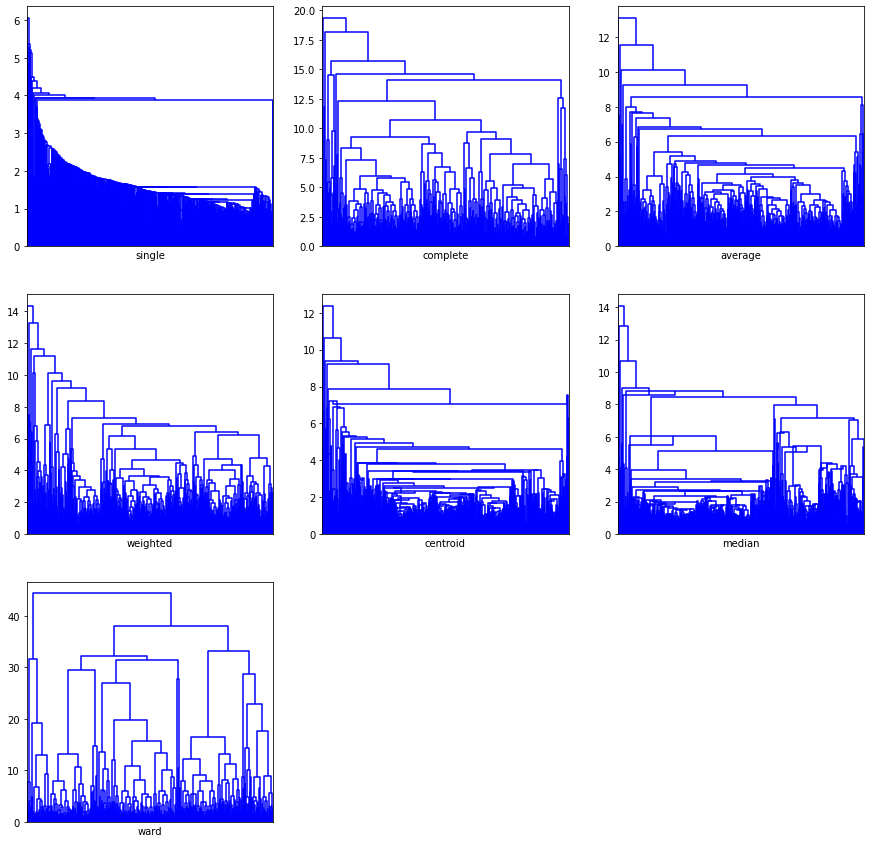

In [32]:
#run hierarchical clustering and find optimal number of clusters (less than 5)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), squeeze=False)
for i, method in enumerate(['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']):
    ax = axes[i // 3, i % 3]
    Z = linkage(pb_df, method=method)
    dendrogram(Z, labels=pb_df.index, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method)
fig.delaxes(axes[2,1])  # remove empty subplots
fig.delaxes(axes[2,2])

In [33]:
#run kmeans with 2 clusters and evaluate
kmeans = KMeans(n_clusters=2, random_state=0).fit(pb_df)

#get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pb_df.columns)
centroids

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999
0,0.686725,0.767849,0.383965,0.668733,0.568418,-0.266933,-0.139455,0.312530,-0.094738,-0.30656,0.091172,0.032896,0.124984,0.034083,-0.062615,0.056979,0.272078
1,-0.569479,-0.636753,-0.318410,-0.554559,-0.471371,0.221359,0.115645,-0.259171,0.078563,0.25422,-0.075606,-0.027280,-0.103645,-0.028264,0.051924,-0.047251,-0.225626


In [34]:
#run kmeans with 4 clusters and evaluate
kmeans = KMeans(n_clusters=4, random_state=0).fit(pb_df)

#get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pb_df.columns)
centroids

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999
0,-0.670645,-0.872577,0.145374,-0.436833,-0.534651,1.249886,0.578293,-1.372479,-0.577623,2.566479,-0.354387,-0.104130,-0.217212,-0.246696,-0.271044,-0.239094,-1.336584
1,0.926065,1.082313,0.238340,0.998560,0.417240,-0.265579,-0.491035,0.232231,-0.221690,-0.282149,0.099434,0.027614,0.116110,0.009037,0.000746,0.132195,0.317732
2,-0.222348,-0.267950,1.629969,-0.058942,1.424071,0.182300,1.857686,-0.362007,0.101803,-0.248964,-0.245011,0.426001,-0.179030,0.137771,0.447775,-0.212972,-0.076632
3,-0.388071,-0.432199,-0.536580,-0.520916,-0.454668,-0.147851,-0.221329,0.234989,0.245254,-0.334264,0.068690,-0.086990,0.013560,0.018811,-0.037929,0.015612,0.111118


In [35]:
#run kmeans 3 clusters and evaluate
kmeans = KMeans(n_clusters=3, random_state=0).fit(pb_df)

#get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pb_df.columns)
centroids

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999
0,0.806477,0.917500,0.892026,0.956135,0.969303,-0.197088,0.205697,0.046751,-0.096467,-0.221360,-0.025775,0.037347,0.063718,0.097655,-0.040913,0.065595,0.219752
1,-0.648339,-0.896403,0.162972,-0.433782,-0.450271,1.288377,0.593136,-1.249629,-0.562312,2.134766,-0.355915,-0.014013,-0.218718,-0.253095,0.578668,-0.226789,-1.353269
2,-0.270463,-0.273469,-0.488826,-0.392823,-0.395966,-0.177424,-0.232453,0.245538,0.170253,-0.347491,0.089816,-0.015975,0.014729,0.004877,-0.103904,0.015514,0.179882


In [36]:
#cluster membership and within cluster distances
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans.labels_, kmeans.transform(pb_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print(f'Cluster {cluster} ({clusterCount[cluster]} members): {withinClusterSS[cluster].round(2)} within cluster')

Cluster 0 (177 members): 2365.44 within cluster
Cluster 1 (75 members): 1261.83 within cluster
Cluster 2 (348 members): 4497.55 within cluster


In [37]:
#after clustering add purchase behavior cluster to main dataframe
X = kmeans.fit_predict(pb_df)
soap_df['PBCluster'] = pd.Series(X, index=soap_df.index)
soap_df.head(15)

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,PBCluster
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,2
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,0
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,0
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,1
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,2
1017020,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601,0
1017110,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015,2
1017160,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258,1
1017360,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


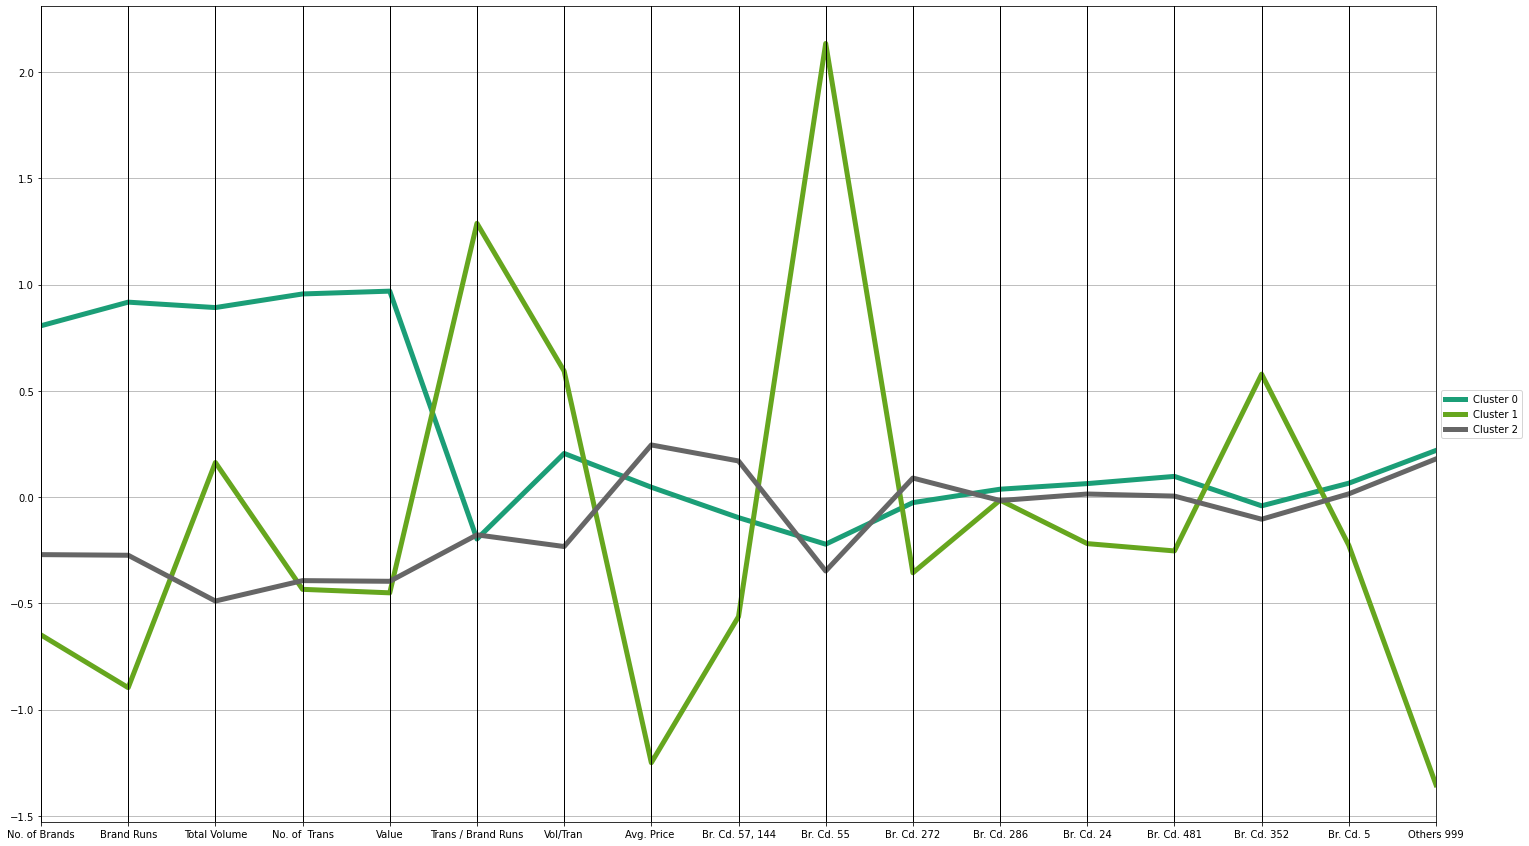

In [38]:
#visualize cluster characteristics, label clusters
centroids['clusters'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize = (25,15))
pd.plotting.parallel_coordinates(centroids, class_column = 'clusters', colormap = 'Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


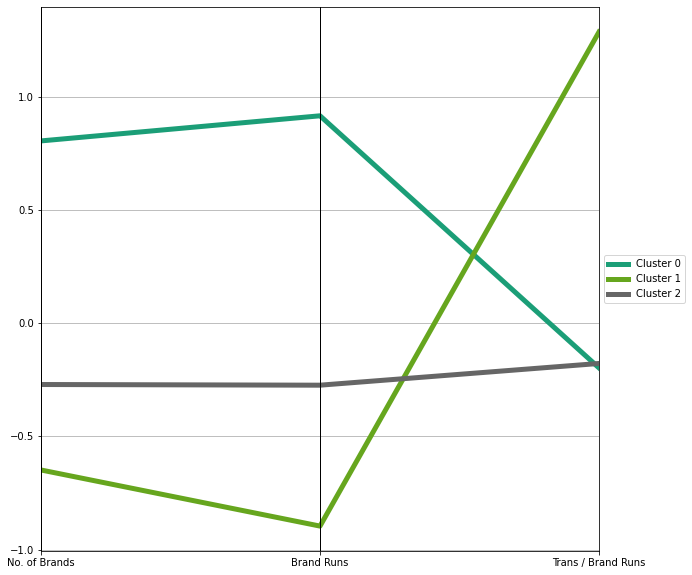

In [39]:
#look at the brand loyalty factors by cluster
centroids = centroids[['No. of Brands', 'Brand Runs', 'Trans / Brand Runs']]
centroids['clusters'] = ['Cluster {}'.format(i) for i in centroids.index]

plt.figure(figsize = (10,10))
pd.plotting.parallel_coordinates(centroids, class_column = 'clusters', colormap = 'Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [40]:
#split dataframe into train/test/validate, run predictive model (keep only purchase behavior variables and cluster column)

# create x with predictor variables and y as outcome variable
X = pb_df
y = soap_df['PBCluster']

# split the dataframe in training, validation, and test partitions

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(336, 17)
(180, 17)
(84, 17)


In [41]:
# create a random forest model model with the training data 

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train_x, train_y)

#evaluation of model
print(classification_report(valid_y, rf.predict(valid_x)))
classificationSummary(valid_y, rf.predict(valid_x))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       1.00      0.85      0.92        26
           2       0.95      0.95      0.95       110

    accuracy                           0.94       180
   macro avg       0.94      0.92      0.93       180
weighted avg       0.94      0.94      0.94       180

Confusion Matrix (Accuracy 0.9389)

       Prediction
Actual   0   1   2
     0  42   0   2
     1   1  22   3
     2   5   0 105


###Basis of Purchase

Utilize Variables:

1.	Pur Vol No Promo - %
3.	Pur Vol 6%
4.	Pur Vol Other Promo %
5.	Price Cat 1 to 4
6.	Proposition Cat 5-15 (all those retained from preprocessing)


In [42]:
#create a new dataframe with only variables from this category
basis_df = soap_norm[['Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 
                      'Pr Cat 4', 'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9', 'PropCat 10', 'PropCat 11',
                      'PropCat 12', 'PropCat 13', 'PropCat 14', 'PropCat 15']].copy()
basis_df.head()

,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,
1010010,0.728635,-0.575827,-0.465644,-0.161736,0.217155,-0.031227,-0.072320,0.140449,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,0.829966,-0.261486,-0.021215,3.589688
1010020,-0.215341,0.463901,-0.241798,0.051111,0.174301,-0.165759,-0.126441,-0.003139,1.532717,-0.358265,-0.420163,-0.262803,-0.264365,0.301536,-0.236478,-0.261486,-0.210590,-0.290201
1014020,0.239133,-0.366156,0.076043,-0.566204,-0.561982,1.577546,-0.462691,-0.672526,0.173827,-0.323929,-0.454785,-0.352876,-0.264365,-0.298493,0.380997,-0.261486,1.599587,-0.253104
1014030,0.728635,-0.575827,-0.465644,-0.994241,-0.299177,1.720601,-0.462691,-0.180850,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,1.743712,-0.290201
1014190,-2.500632,0.980286,2.884545,-0.994241,-1.429203,0.020067,3.752024,1.107504,-0.555525,-0.495454,-0.209632,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,0.030462,-0.290201


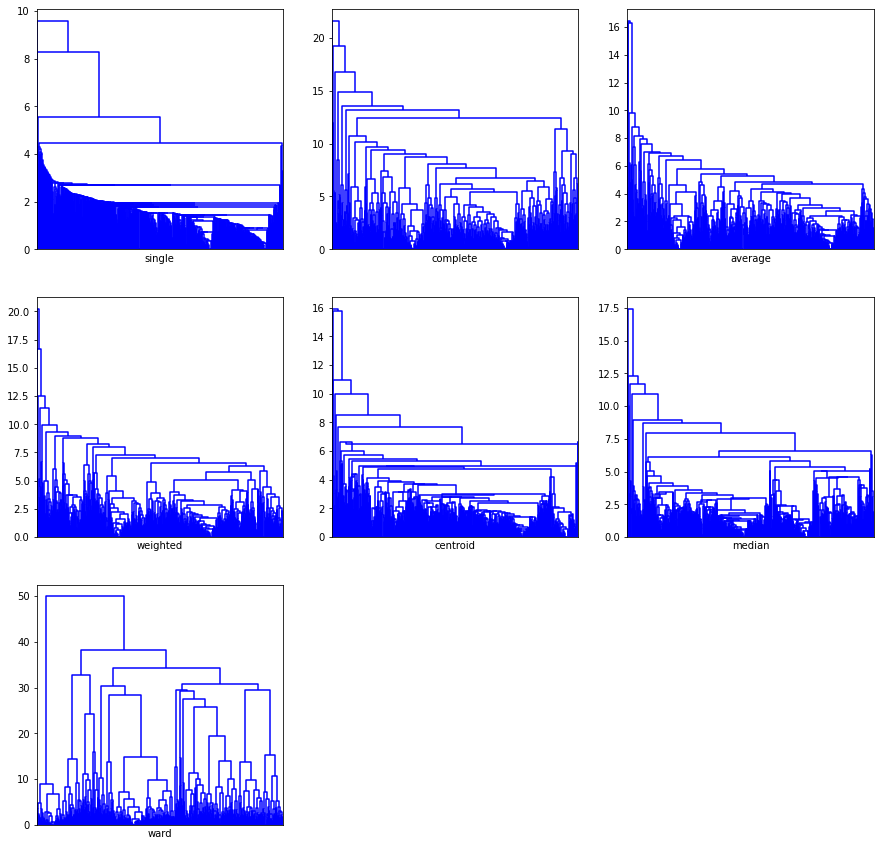

In [43]:
#run hierarchical clustering and find optimal number of clusters (less than 5)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), squeeze=False)
for i, method in enumerate(['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']):
    ax = axes[i // 3, i % 3]
    Z = linkage(basis_df, method=method)
    dendrogram(Z, labels=pb_df.index, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method)
fig.delaxes(axes[2,1])  # remove empty subplots
fig.delaxes(axes[2,2])

In [44]:
#run kmeans with 2 clusters and evaluate
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(basis_df)

#get centroids
centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=basis_df.columns)
centroids2

,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,0.206139,-0.405139,0.181166,-0.784822,-1.124850,2.370782,-0.336576,-1.099474,-0.171183,-0.443118,-0.464954,-0.166758,-0.256810,-0.229474,-0.159745,-0.232433,2.375334,-0.214986
1,-0.030802,0.060538,-0.027071,0.117272,0.168081,-0.354255,0.050293,0.164289,0.025579,0.066213,0.069476,0.024918,0.038374,0.034289,0.023870,0.034731,-0.354935,0.032124


In [45]:
#run kmeans 4 clusters and evaluate
kmeans2 = KMeans(n_clusters=4, random_state=0).fit(basis_df)

#get centroids
centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=basis_df.columns)
centroids2

,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,0.211641,-0.419360,0.190403,-0.782115,-1.136441,2.384384,-0.340721,-1.100905,-0.166010,-0.448861,-0.461368,-0.162549,-0.256712,-0.249906,-0.158749,-0.232055,2.386801,-0.228726
1,0.275170,-0.228940,-0.161024,-0.439854,0.559018,-0.297910,0.152422,0.435433,-0.023617,-0.027961,-0.169966,0.026675,-0.152740,0.062374,-0.099533,-0.204061,-0.301480,0.043136
2,0.204175,-0.240736,-0.027941,1.584789,-0.800736,-0.464440,-0.371244,-0.449486,0.334824,0.415298,0.263224,-0.137927,0.473495,-0.165734,0.256095,0.744904,-0.457786,-0.026420
3,-2.128113,2.207393,0.681076,0.182540,-0.016394,-0.411255,0.334221,-0.092059,-0.330159,-0.119681,0.952285,0.327882,0.196415,0.298985,0.220810,-0.094213,-0.408270,0.101498


In [46]:
#run kmeans (with 3 optimal clusters see ward above) and evaluate
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(basis_df)

#get centroids
centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=basis_df.columns)
centroids2

,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,-0.073247,0.114968,-0.026926,-0.351416,0.476492,-0.319483,0.187141,0.345651,-0.068957,-0.043281,0.046026,0.077026,-0.146334,0.098398,-0.096394,-0.186128,-0.322334,0.072176
1,0.206139,-0.405139,0.181166,-0.784822,-1.124850,2.370782,-0.336576,-1.099474,-0.171183,-0.443118,-0.464954,-0.166758,-0.256810,-0.229474,-0.159745,-0.232433,2.375334,-0.214986
2,0.106885,-0.116028,-0.027540,1.637652,-0.832374,-0.467051,-0.393629,-0.424029,0.332246,0.421401,0.145544,-0.144117,0.637550,-0.173673,0.413995,0.751177,-0.460688,-0.097799


In [47]:
#cluster membership and within cluster distances
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans2.labels_, kmeans2.transform(basis_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print(f'Cluster {cluster} ({clusterCount[cluster]} members): {withinClusterSS[cluster].round(2)} within cluster')

Cluster 0 (399 members): 5492.44 within cluster
Cluster 1 (78 members): 402.51 within cluster
Cluster 2 (123 members): 2674.74 within cluster


In [48]:
#after clustering add basis of purchase cluster to main dataframe
X2 = kmeans2.fit_predict(basis_df)
soap_df['BasisCluster'] = pd.Series(X2, index=soap_df.index)
soap_df.head(15)

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,PBCluster,BasisCluster
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,2,0
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,0,0
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,0,1
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,1,1
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,2,0
1017020,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601,0,0
1017110,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015,2,0
1017160,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258,1,1
1017360,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


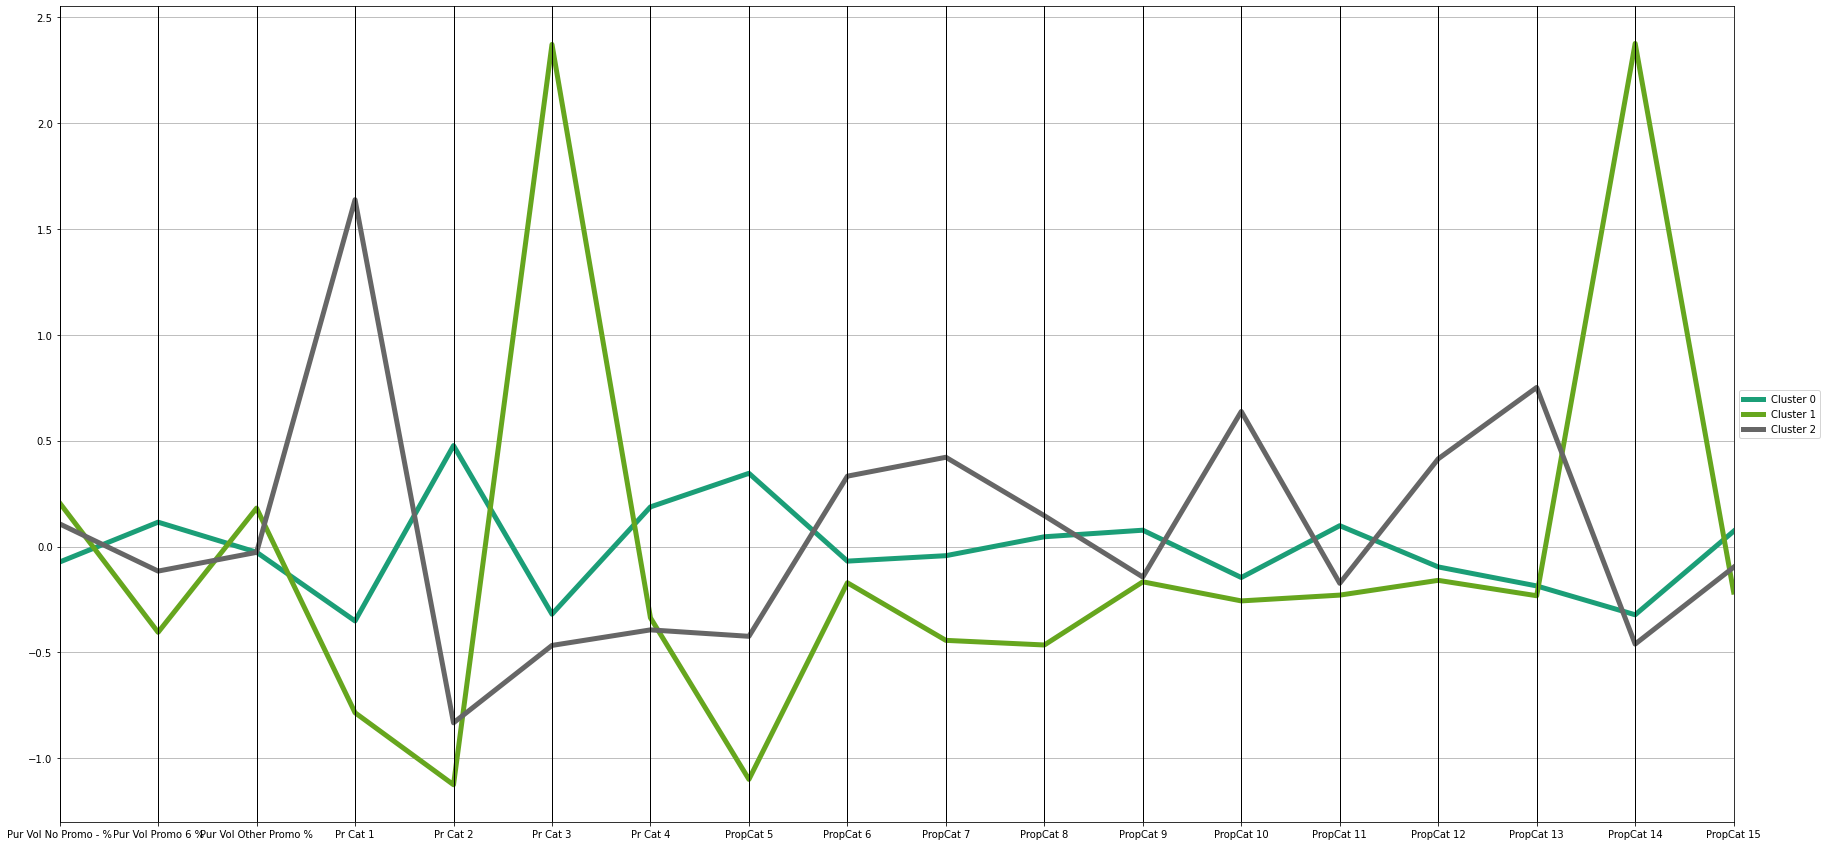

In [49]:
#visualize cluster characteristics, label clusters
centroids2['clusters'] = ['Cluster {}'.format(i) for i in centroids2.index]

plt.figure(figsize = (30,15))
pd.plotting.parallel_coordinates(centroids2, class_column = 'clusters', colormap = 'Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [50]:
#split dataframe into train/test/validate, run predictive model (keep only purchase behavior variables and cluster column)

# create x with predictor variables and y as outcome variable
X = basis_df
y = soap_df['BasisCluster']

# split the dataframe in training, validation, and test partitions

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(336, 18)
(180, 18)
(84, 18)


In [51]:
# create a random forest model model with the training data 

rf2 = RandomForestClassifier(n_estimators=100, random_state=1)
rf2.fit(train_x, train_y)

#evaluation of model
print(classification_report(valid_y, rf2.predict(valid_x)))
classificationSummary(valid_y, rf2.predict(valid_x))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       116
           1       1.00      0.93      0.96        28
           2       0.91      0.89      0.90        36

    accuracy                           0.95       180
   macro avg       0.95      0.93      0.94       180
weighted avg       0.95      0.95      0.95       180

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual   0   1   2
     0 113   0   3
     1   2  26   0
     2   4   0  32


###Combined Clusters
combine all used purchase behavior and basis of purchase variables

In [52]:
#create a new dataframe with all used purchase behavior and basis of purchase variables
combined_df = soap_norm.drop(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS', 'Affluence Index'], axis=1)
combined_df.head()

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,-0.403364,0.120173,-0.501007,-0.410811,-0.588594,-0.464084,-0.324562,-0.439810,0.728635,-0.575827,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,0.829966,-0.261486,-0.021215,3.589688
1010020,0.863748,0.890306,0.265360,0.508057,0.389966,-0.391077,-0.264213,0.052220,-0.215341,0.463901,...,1.532717,-0.358265,-0.420163,-0.262803,-0.264365,0.301536,-0.236478,-0.261486,-0.210590,-0.290201
1014020,0.863748,2.045506,1.440672,1.828930,0.694243,-0.352653,-0.194651,-0.907774,0.239133,-0.366156,...,0.173827,-0.323929,-0.454785,-0.352876,-0.264365,-0.298493,0.380997,-0.261486,1.599587,-0.253104
1014030,-1.036920,-1.131294,-1.341436,-1.559396,-1.386401,-0.621624,-0.161137,-1.132397,0.728635,-0.575827,...,-0.555525,-0.495454,-0.525782,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,1.743712,-0.290201
1014190,-0.403364,-0.938760,-0.465587,-1.042532,-0.845841,-0.172058,0.898835,-1.260753,-2.500632,0.980286,...,-0.555525,-0.495454,-0.209632,-0.490823,-0.264365,-0.298493,-0.236478,-0.261486,0.030462,-0.290201


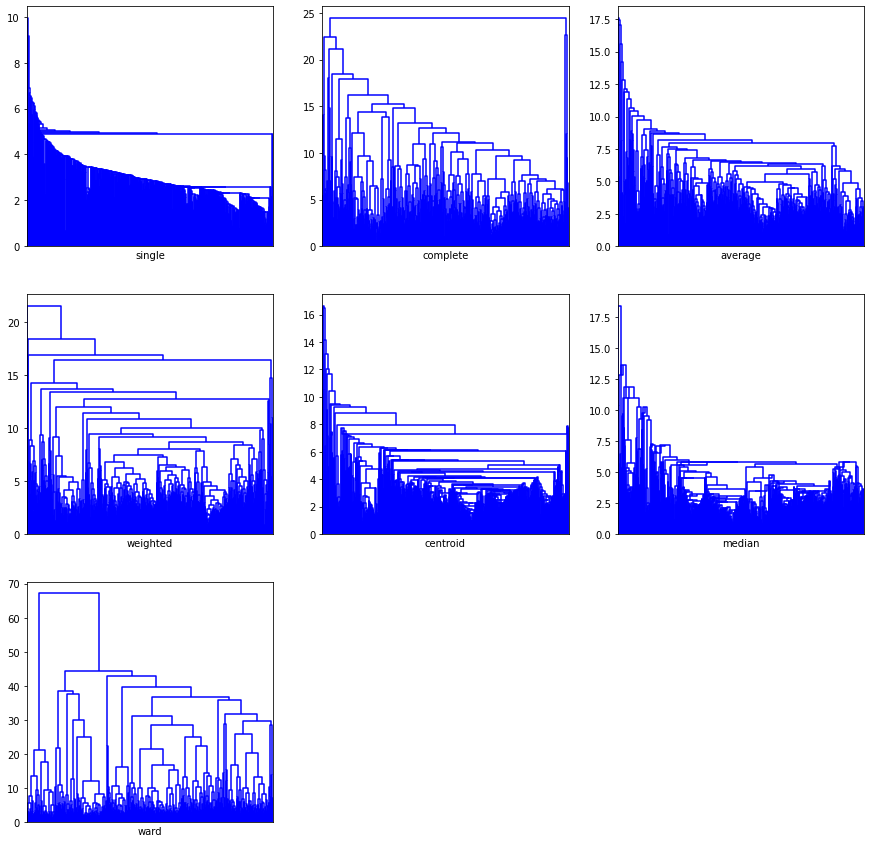

In [53]:
#run hierarchical clustering and find optimal number of clusters (less than 5)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15), squeeze=False)
for i, method in enumerate(['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']):
    ax = axes[i // 3, i % 3]
    Z = linkage(combined_df, method=method)
    dendrogram(Z, labels=combined_df.index, color_threshold=0, ax=ax, no_labels=True)
    ax.set_xlabel(method)
fig.delaxes(axes[2,1])  # remove empty subplots
fig.delaxes(axes[2,2])

In [54]:
#run kmeans and evaluate
kmeans3 = KMeans(n_clusters=2, random_state=0).fit(combined_df)

#get centroids
centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=combined_df.columns)
centroids3

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,-0.463295,-0.711103,0.173050,-0.345621,-0.480722,0.972678,0.510759,-1.300394,0.204064,-0.414498,...,-0.212451,-0.452546,-0.473855,-0.152814,-0.256402,-0.225744,-0.166629,-0.230862,2.446876,-0.242121
1,0.065178,0.100041,-0.024345,0.048623,0.067630,-0.136841,-0.071856,0.182945,-0.028709,0.058313,...,0.029889,0.063666,0.066664,0.021499,0.036072,0.031759,0.023442,0.032479,-0.344237,0.034063


In [55]:
#run kmeans and evaluate
kmeans3 = KMeans(n_clusters=4, random_state=0).fit(combined_df)

#get centroids
centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=combined_df.columns)
centroids3

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,-0.493872,-0.374913,-0.611911,-0.412704,-0.111997,-0.109355,-0.442631,1.478945,0.226233,-0.261659,...,0.339352,0.403440,-0.059042,-0.307713,0.723912,-0.211553,0.467961,0.940866,-0.468387,-0.122496
1,-0.454049,-0.709004,0.172778,-0.332707,-0.473846,0.967815,0.498415,-1.288028,0.204665,-0.416649,...,-0.192222,-0.453118,-0.474547,-0.157321,-0.256508,-0.226714,-0.158850,-0.231270,2.426933,-0.242762
2,0.689291,0.828454,0.057209,0.624858,0.214791,-0.296353,-0.417208,0.221488,-0.491153,0.621363,...,0.123323,0.042823,0.578561,0.305904,-0.045423,0.340950,0.028293,-0.069172,-0.343641,0.116010
3,-0.280560,-0.370914,0.136049,-0.294434,0.005588,-0.005682,0.393217,-0.369295,0.289567,-0.324064,...,-0.184987,-0.051073,-0.347129,-0.103617,-0.164033,-0.151197,-0.160913,-0.237687,-0.300718,0.023525


In [56]:
#run kmeans and evaluate
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(combined_df)

#get centroids
centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=combined_df.columns)
centroids3

,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,0.286012,0.504815,-0.226090,0.339565,0.126571,-0.229559,-0.508025,0.808148,-0.348175,0.390283,...,0.247595,0.249822,0.480246,0.199142,0.275013,-0.030437,0.215553,0.367756,-0.436638,0.099680
1,-0.102478,-0.207263,0.128819,-0.172258,0.022882,-0.066449,0.259283,-0.291707,0.213829,-0.193717,...,-0.135394,-0.077663,-0.247326,-0.113368,-0.145332,0.078978,-0.122408,-0.222063,-0.274087,-0.015754
2,-0.463295,-0.711103,0.173050,-0.345621,-0.480722,0.972678,0.510759,-1.300394,0.204064,-0.414498,...,-0.212451,-0.452546,-0.473855,-0.152814,-0.256402,-0.225744,-0.166629,-0.230862,2.446876,-0.242121


In [57]:
centroids3.transpose()

,0,1,2
No. of Brands,0.286012,-0.102478,-0.463295
Brand Runs,0.504815,-0.207263,-0.711103
Total Volume,-0.226090,0.128819,0.173050
No. of Trans,0.339565,-0.172258,-0.345621
Value,0.126571,0.022882,-0.480722
Trans / Brand Runs,-0.229559,-0.066449,0.972678
Vol/Tran,-0.508025,0.259283,0.510759
Avg. Price,0.808148,-0.291707,-1.300394
Pur Vol No Promo - %,-0.348175,0.213829,0.204064
Pur Vol Promo 6 %,0.390283,-0.193717,-0.414498


In [58]:
#cluster membership and within cluster distances
withinClusterSS = [0] * 3
clusterCount = [0] * 3
for cluster, distance in zip(kmeans3.labels_, kmeans3.transform(combined_df)):
    withinClusterSS[cluster] += distance[cluster]**2
    clusterCount[cluster] += 1
for cluster, withClustSS in enumerate(withinClusterSS):
    print(f'Cluster {cluster} ({clusterCount[cluster]} members): {withinClusterSS[cluster].round(2)} within cluster')

Cluster 0 (227 members): 8254.16 within cluster
Cluster 1 (299 members): 7840.59 within cluster
Cluster 2 (74 members): 1107.42 within cluster


In [59]:
#after clustering add combined clusters to main dataframe
X3 = kmeans3.fit_predict(combined_df)
soap_df['CombCluster'] = pd.Series(X3, index=soap_df.index)
soap_df.head(15)

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,PBCluster,BasisCluster,CombCluster
Member id,,,,,,,,,,,,,,,,,,,,,
1010010,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,2,0,1
1010020,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,0,0,0
1014020,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,0,1,2
1014030,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,1,1,2
1014190,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,2,0,1
1017020,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601,0,0,1
1017110,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015,2,0,1
1017160,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258,1,1,2
1017360,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1


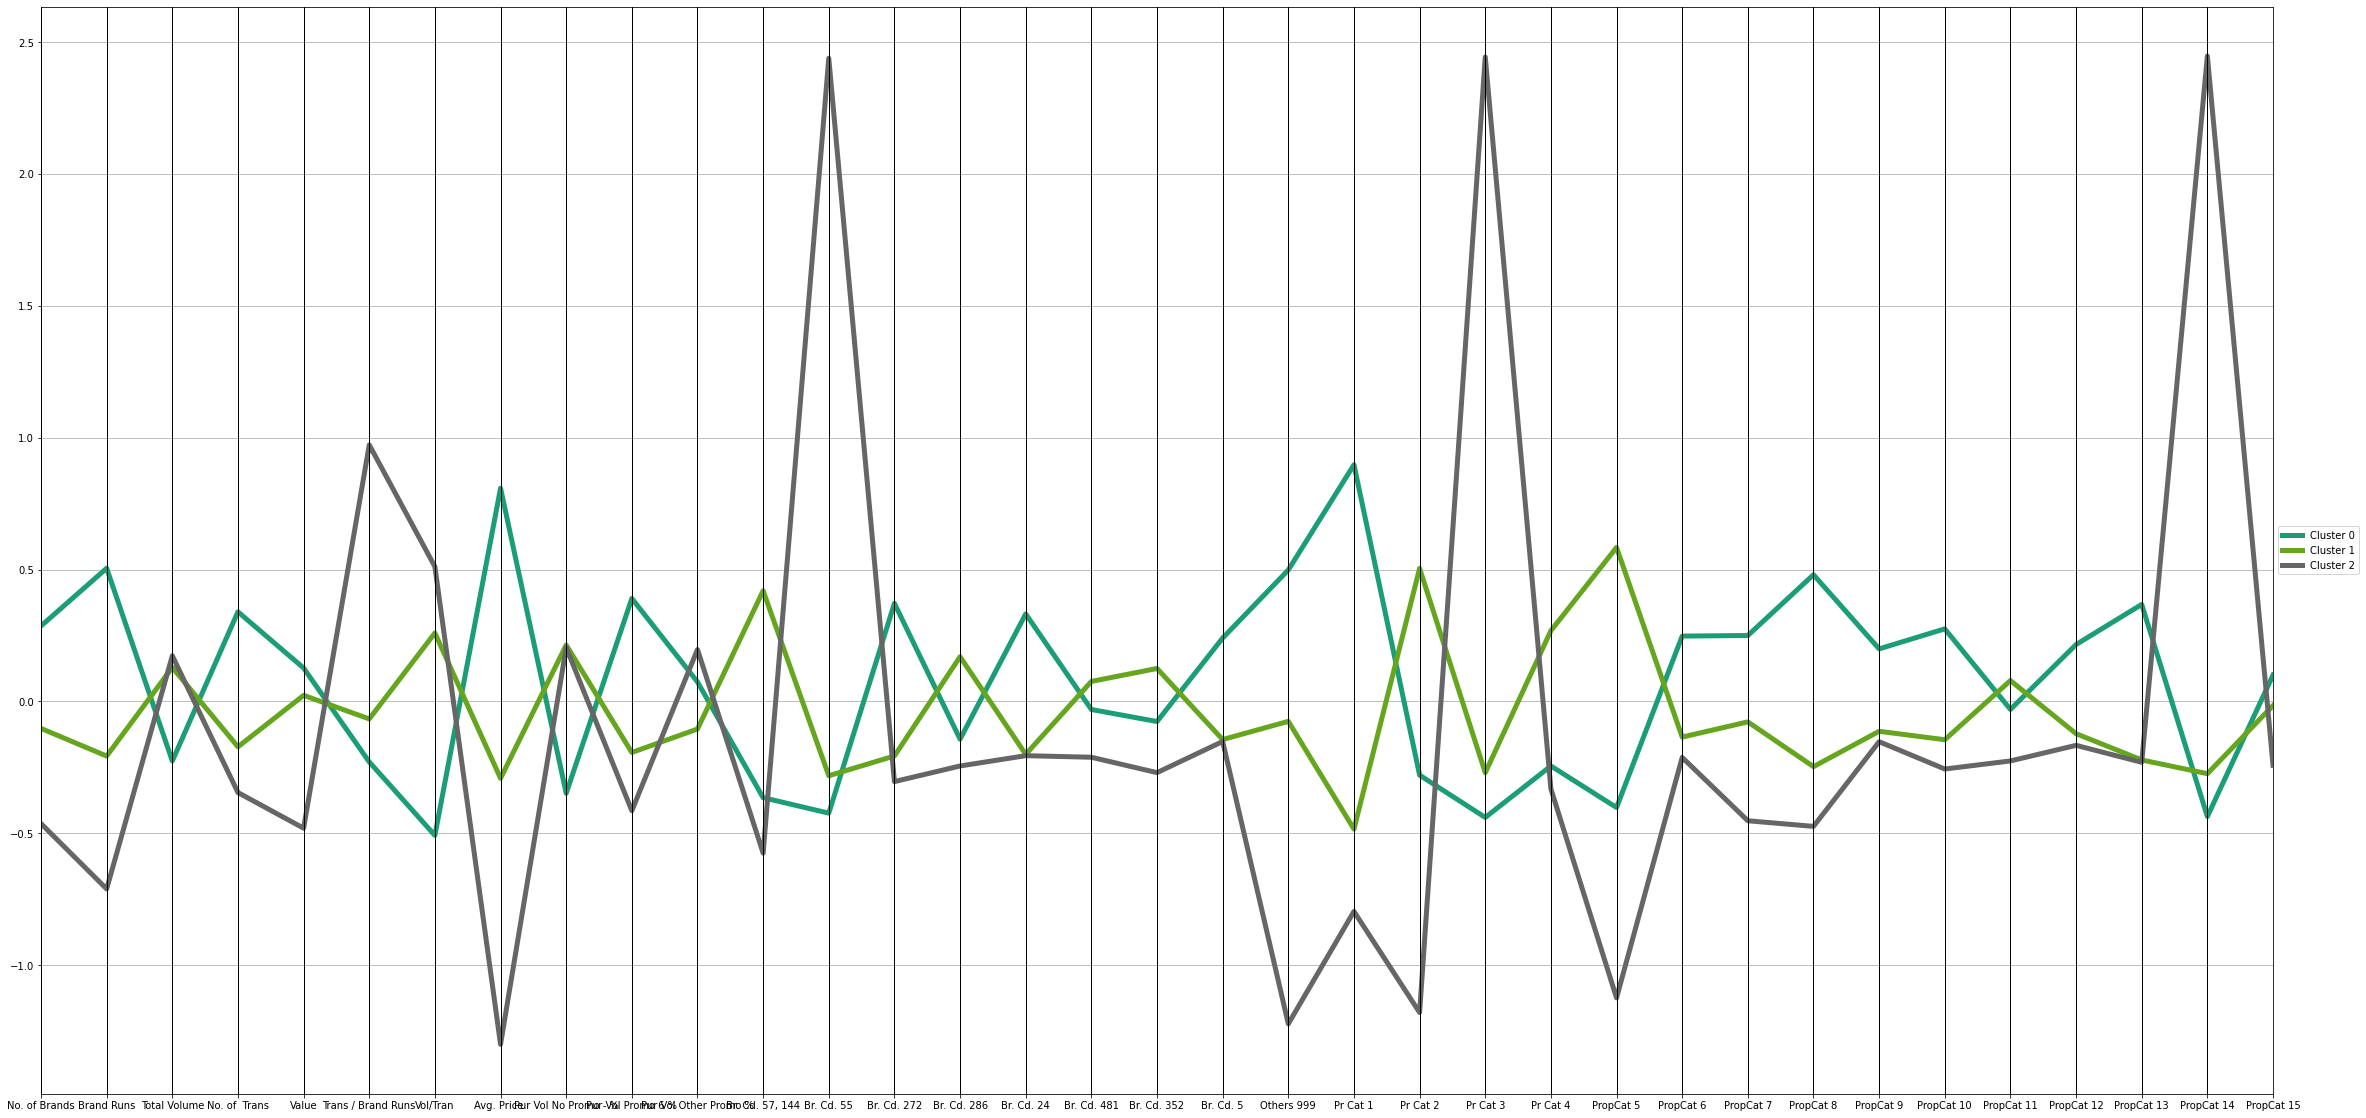

In [60]:
#visualize cluster characteristics, label clusters
centroids3['clusters'] = ['Cluster {}'.format(i) for i in centroids3.index]

plt.figure(figsize = (40,20))
pd.plotting.parallel_coordinates(centroids3, class_column = 'clusters', colormap = 'Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


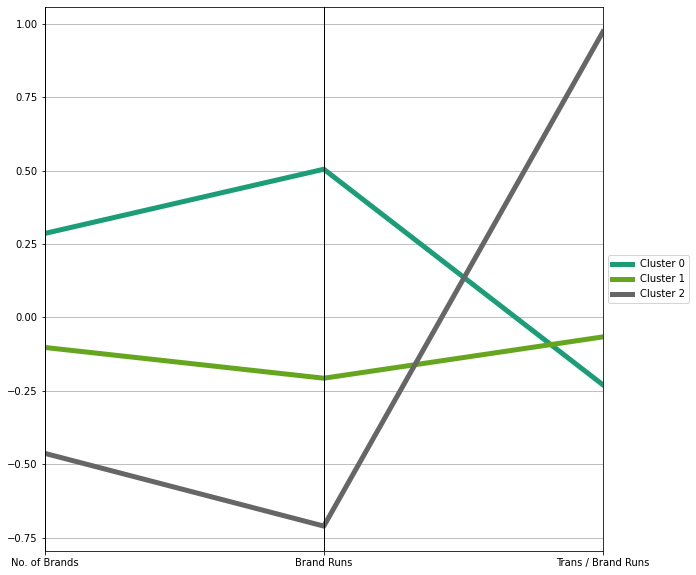

In [61]:
#look at the brand loyalty factors by cluster
centroids3 = centroids3[['No. of Brands', 'Brand Runs', 'Trans / Brand Runs']]
centroids3['clusters'] = ['Cluster {}'.format(i) for i in centroids3.index]

plt.figure(figsize = (10,10))
pd.plotting.parallel_coordinates(centroids3, class_column = 'clusters', colormap = 'Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [62]:
#split dataframe into train/test/validate, run predictive model

# create x with predictor variables and y as outcome variable
X3 = combined_df
y3 = soap_df['CombCluster']

# split the dataframe in training, validation, and test partitions

train_x, valid_x, train_y, valid_y = train_test_split(X3, y3, test_size=0.3, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=1)

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(336, 35)
(180, 35)
(84, 35)


In [63]:
# create a random forest model model with the training data 

rf3 = RandomForestClassifier(n_estimators=100, random_state=1)
rf3.fit(train_x, train_y)

#evaluation of model
print(classification_report(valid_y, rf3.predict(valid_x)))
classificationSummary(valid_y, rf3.predict(valid_x))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.94      0.97      0.95        93
           2       0.96      0.96      0.96        26

    accuracy                           0.95       180
   macro avg       0.95      0.95      0.95       180
weighted avg       0.95      0.95      0.95       180

Confusion Matrix (Accuracy 0.9500)

       Prediction
Actual  0  1  2
     0 56  5  0
     1  2 90  1
     2  0  1 25
